<a href="https://colab.research.google.com/github/Manisha1208/NNDL/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOMENTUM GRADIENT DESCENT OPTIMISER

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns


In [19]:
load_data = pd.read_csv("/content/Assignment_10.csv")
load_data.head()


,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [30]:

type(load_data)

pandas.core.frame.DataFrame

In [29]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [31]:
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [32]:
data.shape

(2183, 1)

In [33]:
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [35]:
data.corr()

,5551.82208
5551.82208,1.0


VALIDATING NULL VALUE

In [27]:
data.isnull().sum()

5551.82208    0
dtype: int64

VISUALISING OUTLINERS OF DATA

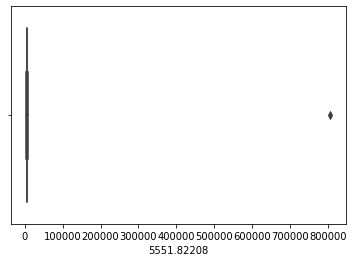

In [37]:
sns.boxplot(x=data['5551.82208'])

In [38]:

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))


(array([928]),)


From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

In [40]:
data.iloc[928,0] = data.iloc[927,0]

AFTER REPLACING THE OUTLINER

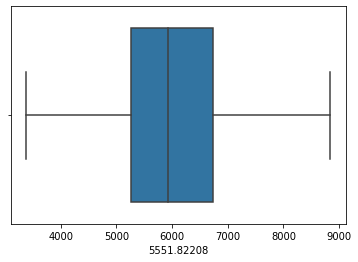

In [42]:
sns.boxplot(x=data['5551.82208'])

now all outliners are removed and now we are good to train the model

In [43]:
data_x = []
data_y = []
for i in range(0,len(data)-24):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+24,0])


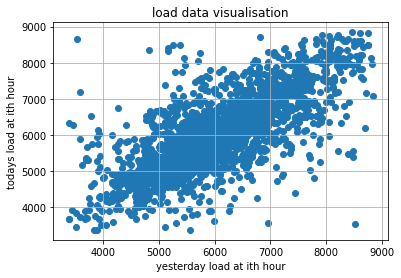

In [44]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()


In [45]:

data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
8841.66948
8841.66948


DATA NORMALISATION

In [46]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [47]:
data_norm = []
for i in range(len(data)-24):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472
...,...,...
2154,0.231719,0.228524
2155,0.445808,0.217797
2156,0.684146,0.246298
2157,0.514679,0.324384


SPLITTING DATA SET

In [48]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [49]:
data_norm.head()

,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472


In [52]:
data_x = np.array(data_train[0])

In [53]:
data_y = np.array(data_train[1])

In [54]:
len(data_x)

1943

In [55]:
len(data_test)

216

TRAINING THE MODEL

In [56]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train)
error = []
vm = 0
vc = 0
moment = 0.9

In [57]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )
    # print("derivatives at ",i,"   ",der_m,der_c)

    # calculating change in m and c
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    # print("changes at ",i,vm,vc)

    #updating m and c
    m = m + vm
    c = c + vc
    # print("values at",i,m,c)

  err=0
  for i in range(0,len(data_train)):
    err+=((data_y[i] - (m * data_x[i]) - c))**2
  err = (1/(2*len(data_train))) * err
  error.append(err)
    #incrementing no of iterations
  iter = iter + 1
 

  
print(m,c)

0.6016770344362548 0.06546430447526708


In [58]:
len(error)


100

In [59]:
iters = np.arange(epochs)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [63]:
mse_train = mean_squared_error(data_y,pred)

In [64]:
data_test

,0,1
328,0.765228,0.938347
1320,0.486434,0.445636
483,0.622550,0.607001
24,0.255799,0.314798
1567,0.331802,0.537645
...,...,...
1298,0.348350,0.100425
516,0.417049,0.395424
33,0.407977,0.535477
1088,0.520955,0.391487


In [66]:

pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

MEAN SQUARED ERRORS

In [67]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.03461387630671945
Testing data mean squared error: 0.02870616062012834


In [68]:
print("model parameter:",m,c)

model parameter: 0.6016770344362548 0.06546430447526708


VISUALISING TRAINING DATA

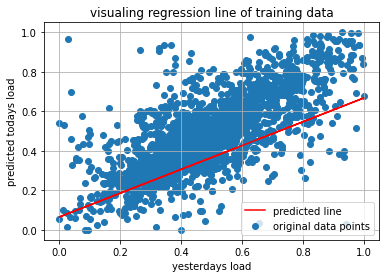

In [69]:
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

VISUALISING TESTING DATA

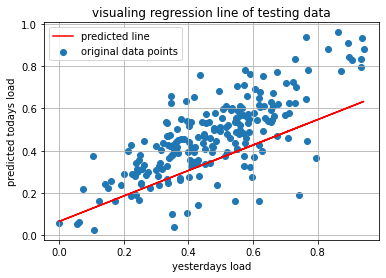

In [70]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

DEPLOYMENT OF MODEL

In [72]:
input_load = float(input("enter yesterday load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5070.5
predicted load for this hour is :  4753.986941337954
